In [22]:
import numpy as np
from skfuzzy import control as ctrl
from skfuzzy import membership as mf

In [23]:
calories = ctrl.Antecedent(np.arange(0, 1000, 1), 'calories')
protein = ctrl.Antecedent(np.arange(0, 50, 1), 'protein')
fiber = ctrl.Antecedent(np.arange(0, 20, 1), 'fiber')

healthiness = ctrl.Consequent(np.arange(0, 10, 1), 'healthiness')

In [24]:
calories['low'] = mf.trimf(calories.universe, [0, 0, 400])
calories['mid'] = mf.trimf(calories.universe, [300, 500, 700])
calories['high'] = mf.trapmf(calories.universe, [600, 800, 1000, 1000])

protein['low'] = mf.trimf(protein.universe, [0, 0, 15])
protein['mid'] = mf.trimf(protein.universe, [10, 25, 35])
protein['high'] = mf.trapmf(protein.universe, [30, 40, 50, 50])

fiber['low'] = mf.trimf(fiber.universe, [0, 0, 5])
fiber['mid'] = mf.trimf(fiber.universe, [4, 8, 12])
fiber['high'] = mf.trapmf(fiber.universe, [10, 15, 20, 20])

healthiness['unhealthy'] = mf.trimf(healthiness.universe, [0, 0, 3])
healthiness['acceptable'] = mf.trimf(healthiness.universe, [2, 5, 7])
healthiness['healthy'] = mf.trapmf(healthiness.universe, [6, 8, 10, 10])

In [25]:
rules = [
    ctrl.Rule(calories['low'] & protein['low'] & fiber['low'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['low'] & protein['low'] & fiber['mid'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['low'] & protein['low'] & fiber['high'], (healthiness['unhealthy'])),

    ctrl.Rule(calories['low'] & protein['mid'] & fiber['low'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['low'] & protein['mid'] & fiber['mid'], (healthiness['acceptable'])),
    ctrl.Rule(calories['low'] & protein['mid'] & fiber['high'], (healthiness['healthy'])),

    ctrl.Rule(calories['low'] & protein['high'] & fiber['low'], (healthiness['healthy'])),
    ctrl.Rule(calories['low'] & protein['high'] & fiber['mid'], (healthiness['healthy'])),
    ctrl.Rule(calories['low'] & protein['high'] & fiber['high'], (healthiness['healthy'])),

    ctrl.Rule(calories['mid'] & protein['low'] & fiber['low'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['mid'] & protein['low'] & fiber['mid'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['mid'] & protein['low'] & fiber['high'], (healthiness['acceptable'])),

    ctrl.Rule(calories['mid'] & protein['mid'] & fiber['low'], (healthiness['acceptable'])),
    ctrl.Rule(calories['mid'] & protein['mid'] & fiber['mid'], (healthiness['acceptable'])),
    ctrl.Rule(calories['mid'] & protein['mid'] & fiber['high'], (healthiness['healthy'])),

    ctrl.Rule(calories['mid'] & protein['high'] & fiber['low'], (healthiness['acceptable'])),
    ctrl.Rule(calories['mid'] & protein['high'] & fiber['mid'], (healthiness['healthy'])),
    ctrl.Rule(calories['mid'] & protein['high'] & fiber['high'], (healthiness['healthy'])),

    ctrl.Rule(calories['high'] & protein['low'] & fiber['low'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['high'] & protein['low'] & fiber['mid'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['high'] & protein['low'] & fiber['high'], (healthiness['acceptable'])),

    ctrl.Rule(calories['high'] & protein['mid'] & fiber['low'], (healthiness['unhealthy'])),
    ctrl.Rule(calories['high'] & protein['mid'] & fiber['mid'], (healthiness['acceptable'])),
    ctrl.Rule(calories['high'] & protein['mid'] & fiber['high'], (healthiness['acceptable'])),

    ctrl.Rule(calories['high'] & protein['high'] & fiber['low'], (healthiness['acceptable'])),
    ctrl.Rule(calories['high'] & protein['high'] & fiber['mid'], (healthiness['acceptable'])),
    ctrl.Rule(calories['high'] & protein['high'] & fiber['high'], (healthiness['acceptable'])),
]

food_ctrl = ctrl.ControlSystem(rules=rules)

food = ctrl.ControlSystemSimulation(control_system=food_ctrl)

{'healthiness': np.float64(7.833333333333333)}


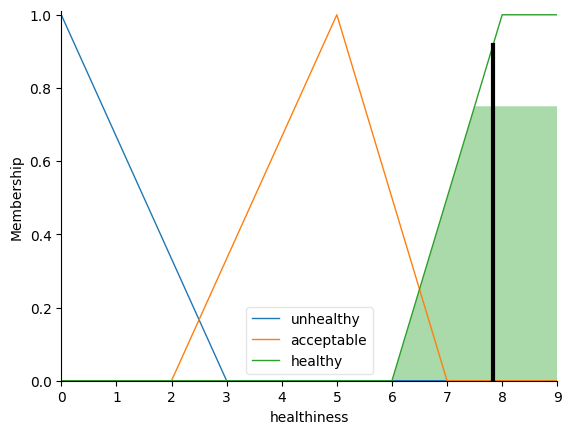

In [35]:
food.input['calories'] = 100
food.input['protein'] = 50
food.input['fiber'] = 20

food.compute()

print(food.output)

healthiness.view(sim = food)